In [20]:
import os.path

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from notebooks.analytics.utils import init_analysis, savefig, boxplot_metric

In [21]:
#EXP_NAME = "daeclust_2000_05-clusters" # multi clusters, tol: 2, all fixed same setup as fed_avg_08
#EXP_NAME = "daeclust_2000_06-clusters" # multi clusters, tol: 2, all fixed
EXP_NAME = "daeclust_2000_07-clusters" # multi clusters, tol: 2, all fixed
#EXP_NAME = "daeclust_09-clusters" # multi clusters, tol: 2, all fixed

#EXP_NAME = "daeclust_12-clusters"
#EXP_NAME = "daeclust_16-clusters"
#EXP_NAME = "daeclust_17_00-clusters"
#EXP_NAME = "daeclust_18_00-clusters"
df = init_analysis(EXP_NAME)

C:\Users\micdu\Code\pythonProject\dmtl\notebooks\analytics\utils.py:80: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  plot_fig.show()


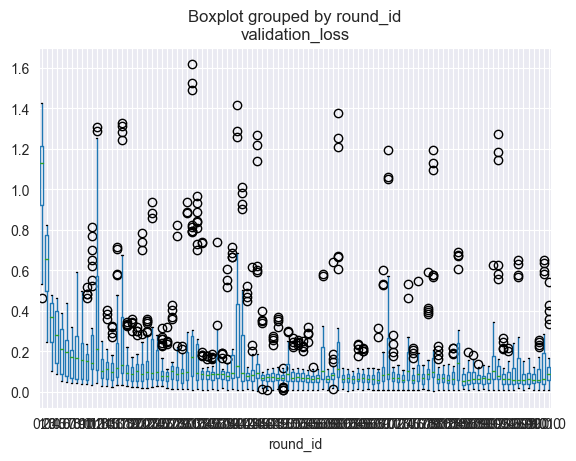

In [23]:
boxplot_metric(df, "validation_loss")

C:\Users\micdu\Code\pythonProject\dmtl\notebooks\analytics\utils.py:80: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  plot_fig.show()


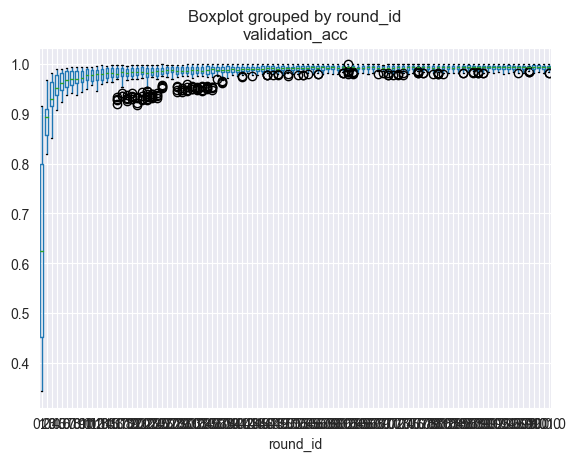

In [24]:
boxplot_metric(df, "validation_acc")

In [25]:
dataset_perf = df.loc[df.round_id < 32].groupby(["round_id","dataset"])
dataset_perf["validation_loss"].mean()

round_id  dataset
0.0       mnist      1.071540
1.0       mnist      0.509483
2.0       mnist      0.297087
3.0       mnist      0.228864
4.0       mnist      0.177193
5.0       mnist      0.151621
6.0       mnist      0.136631
7.0       mnist      0.153602
8.0       mnist      0.146450
9.0       mnist      0.120156
10.0      mnist      0.129481
11.0      mnist      0.186636
12.0      mnist      0.100014
13.0      mnist      0.096328
14.0      mnist      0.089963
15.0      mnist      0.113532
16.0      mnist      0.177467
17.0      mnist      0.099359
18.0      mnist      0.089294
19.0      mnist      0.090225
20.0      mnist      0.088761
21.0      mnist      0.108998
22.0      mnist      0.109837
23.0      mnist      0.091598
24.0      mnist      0.075485
25.0      mnist      0.069844
26.0      mnist      0.068022
27.0      mnist      0.083609
28.0      mnist      0.076009
29.0      mnist      0.083472
30.0      mnist      0.200727
31.0      mnist      0.096628
Name: validation_loss,

C:\Users\micdu\AppData\Local\Temp\ipykernel_24680\1895144522.py:4: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  cluster_count_fig.show()


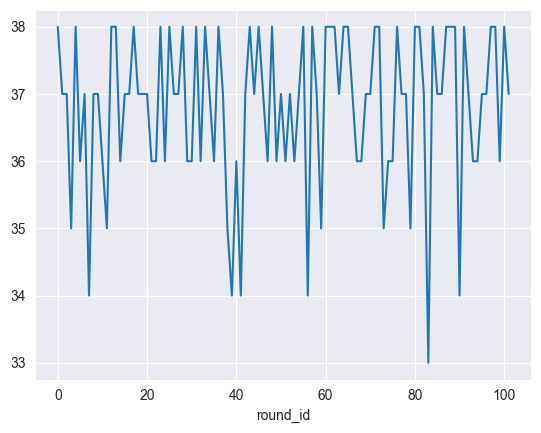

In [26]:
cluster_count_ax = df.groupby("round_id")["cluster_id"].nunique().plot()
cluster_count_fig = cluster_count_ax.get_figure()
savefig(cluster_count_fig, "cluster_count")
cluster_count_fig.show()

In [27]:
n_clusters = df.groupby("round_id")["cluster_id"].nunique()
loss = df.groupby("round_id")["validation_loss"].mean()

np.corrcoef(loss, n_clusters)

array([[ 1.        , -0.00399311],
       [-0.00399311,  1.        ]])

In [28]:
np.corrcoef(loss[1:], n_clusters[:len(n_clusters)-2])

array([[ 1.        , -0.05325383],
       [-0.05325383,  1.        ]])

In [29]:
#EXP_NAME = "daeclust_2000_05-clusters-selection"
#EXP_NAME = "daeclust_2000_07-clusters-selection"
#EXP_NAME = "daeclust_11-clusters-selection"
#EXP_NAME = "daeclust_12-clusters-selection"
EXP_NAME = "daeclust_13-clusters-selection"
#EXP_NAME = "daeclust_15-clusters-selection"

df = init_analysis(EXP_NAME)

In [30]:
df_fed_avg = init_analysis("fed_avg_12")

In [31]:
grouped_fed_avg = df_fed_avg.groupby(["cluster_id","round_id","dataset"])["test_loss"].mean().reset_index()
grouped_fed_avg

,cluster_id,round_id,dataset,test_loss
0,global,0.0,mnist,NaN
1,global,1.0,fmnist,0.069525
2,global,1.0,mnist,0.023990
3,global,2.0,fmnist,0.040927
4,global,2.0,mnist,0.021671
...,...,...,...,...
200,global,100.0,mnist,0.003567
201,global,101.0,fmnist,0.009397
202,global,101.0,mnist,0.003508
203,global,102.0,fmnist,0.009342


In [32]:
grouped = df.groupby(["cluster_id","round_id","dataset"])["test_loss"].mean().reset_index()
grouped

,cluster_id,round_id,dataset,test_loss
0,02b2638a888fce1c3331f334bf584fdfbe2a4e9c884869...,52.0,fmnist,0.031930
1,02b2638a888fce1c3331f334bf584fdfbe2a4e9c884869...,52.0,mnist,0.003531
2,03289eacf4f9f33620ecc6cec3a9a60aff97c3eaeeb2d5...,95.0,fmnist,0.008310
3,03289eacf4f9f33620ecc6cec3a9a60aff97c3eaeeb2d5...,95.0,mnist,0.007708
4,042ce7c13a6b6f53bcd234690c5957831e036fffca537e...,51.0,fmnist,0.031959
...,...,...,...,...
455,fde8ce91e30891eb9862c41c4ad538931c5845c28c5b30...,101.0,mnist,0.007544
456,fea2f67e5bf152255dba2ac375fde2697ec092de5b4c8e...,85.0,fmnist,0.030268
457,fea2f67e5bf152255dba2ac375fde2697ec092de5b4c8e...,85.0,mnist,0.003068
458,feaa76aac42ff292f1f87dd9b967755ac5e3f9cc71f2a9...,2.0,fmnist,0.021404


In [33]:
pd.concat([grouped, grouped_fed_avg]).loc[grouped.round_id == 100].groupby(["cluster_id", "dataset"]).mean()

round_id  \
cluster_id                                         dataset             
5c8f3a3f73c36da99f8dda582de4b7fd495d292bd869b77... fmnist      100.0   
                                                   mnist       100.0   
f8c8e34b46ffae82c447a7ba677bf8336c53945fa12bc65... fmnist      100.0   
                                                   mnist       100.0   
global                                             fmnist       92.0   
                                                   mnist        91.0   

                                                            test_loss  
cluster_id                                         dataset             
5c8f3a3f73c36da99f8dda582de4b7fd495d292bd869b77... fmnist    0.029763  
                                                   mnist     0.002961  
f8c8e34b46ffae82c447a7ba677bf8336c53945fa12bc65... fmnist    0.008078  
                                                   mnist     0.007657  
global                                             fmnist    0.009463  
                                                   mnist     0.003653

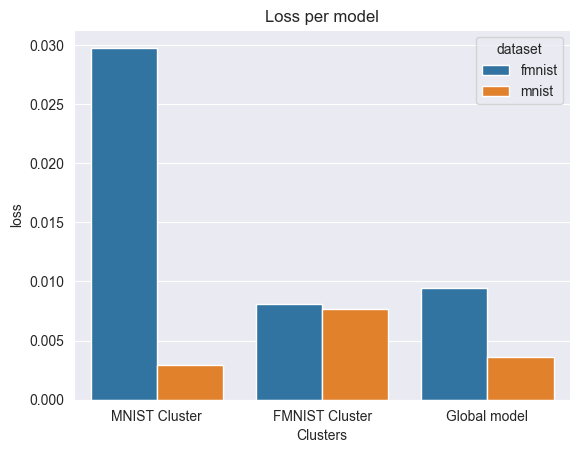

In [34]:
import seaborn as sns

ax = sns.barplot(data=pd.concat([grouped, grouped_fed_avg]).loc[grouped.round_id == 100],
            x="cluster_id", hue="dataset", y="test_loss")
ax.set_xticklabels(["MNIST Cluster", "FMNIST Cluster", "Global model"])
plt.title("Loss per model")
plt.xlabel("Clusters")
plt.ylabel("loss")
savefig(plt, "loss_per_cluster")
plt.show()

In [35]:
df.groupby(["round_id", "cluster_id", "dataset"]).mean()

C:\Users\micdu\AppData\Local\Temp\ipykernel_24680\1033696842.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby(["round_id", "cluster_id", "dataset"]).mean()


Unnamed: 0  \
round_id cluster_id                                         dataset                
1.0      1bbc61548e36f139bb6e3935e36162a57daf1477df4e7d4... fmnist    777.105263   
                                                            mnist     783.666667   
         1dfd71b325e2c8f38765444b2b2159668635168777807f1... fmnist    214.111111   
                                                            mnist     221.842105   
         215aa7ff58bfc053bccbb0106f4516a436ff01577cd6e31... fmnist    906.444444   
...                                                                          ...   
100.0    f8c8e34b46ffae82c447a7ba677bf8336c53945fa12bc65... mnist    8578.368421   
101.0    eac22269a5e27f729257fb2126c2efb8c23c2bb7aa695b1... fmnist   8652.421053   
                                                            mnist    8655.368421   
         fde8ce91e30891eb9862c41c4ad538931c5845c28c5b30c... fmnist   8625.315789   
                                                            mnist    8616.894737   

                                                                     epoch  \
round_id cluster_id                                         dataset          
1.0      1bbc61548e36f139bb6e3935e36162a57daf1477df4e7d4... fmnist     0.0   
                                                            mnist      0.0   
         1dfd71b325e2c8f38765444b2b2159668635168777807f1... fmnist     0.0   
                                                            mnist      0.0   
         215aa7ff58bfc053bccbb0106f4516a436ff01577cd6e31... fmnist     0.0   
...                                                                    ...   
100.0    f8c8e34b46ffae82c447a7ba677bf8336c53945fa12bc65... mnist      0.0   
101.0    eac22269a5e27f729257fb2126c2efb8c23c2bb7aa695b1... fmnist     0.0   
                                                            mnist      0.0   
         fde8ce91e30891eb9862c41c4ad538931c5845c28c5b30c... fmnist     0.0   
                                                            mnist      0.0   

                                                                     test_loss  \
round_id cluster_id                                         dataset              
1.0      1bbc61548e36f139bb6e3935e36162a57daf1477df4e7d4... fmnist    0.067312   
                                                            mnist     0.027074   
         1dfd71b325e2c8f38765444b2b2159668635168777807f1... fmnist    0.203555   
                                                            mnist     0.113082   
         215aa7ff58bfc053bccbb0106f4516a436ff01577cd6e31... fmnist    0.030017   
...                                                                        ...   
100.0    f8c8e34b46ffae82c447a7ba677bf8336c53945fa12bc65... mnist     0.007657   
101.0    eac22269a5e27f729257fb2126c2efb8c23c2bb7aa695b1... fmnist    0.029988   
                                                            mnist     0.002950   
         fde8ce91e30891eb9862c41c4ad538931c5845c28c5b30c... fmnist    0.007992   
                                                            mnist     0.007544   

                                                                     test  \
round_id cluster_id                                         dataset         
1.0      1bbc61548e36f139bb6e3935e36162a57daf1477df4e7d4... fmnist    1.0   
                                                            mnist     1.0   
         1dfd71b325e2c8f38765444b2b2159668635168777807f1... fmnist    1.0   
                                                            mnist     1.0   
         215aa7ff58bfc053bccbb0106f4516a436ff01577cd6e31... fmnist    1.0   
...                                                                   ...   
100.0    f8c8e34b46ffae82c447a7ba677bf8336c53945fa12bc65... mnist     1.0   
101.0    eac22269a5e27f729257fb2126c2efb8c23c2bb7aa695b1... fmnist    1.0   
                                                            mnist     1.0   
         fde8ce91e30891eb9862c41c4ad538931c5845c

In [36]:
boxplot_metric(df, "test_acc")

In [37]:
df.groupby(["round_id", "trainer_id"]).max().boxplot("", by="round_id")

KeyboardInterrupt: 